In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras as K

%matplotlib inline

In [2]:
data = open("opto.txt","r").read()

In [3]:
chars = sorted(set(data))
data_size, vocab_size = len(data), len(chars)
print ('Data has {} characters, {} unique.'.format(data_size, vocab_size))

char_to_num = { ch:i for i,ch in enumerate(chars) }
num_to_char = { i:ch for i,ch in enumerate(chars) }

Data has 1146162 characters, 100 unique.


In [4]:
def hot_enc(j):
    e = np.zeros([len(j),vocab_size])
    e[range(len(j)),j]=1.
    return e

def cold_enc(e):
    return e.argmax(axis=-1)

def multinomial_choice(e, T = 1.):
    preds = e**(1/T)
    #preds = np.exp(np.log(e)/T)
    #preds = np.exp(-e/T)
    norm_preds = preds/np.sum(preds,axis=-1).reshape([-1,1])
    return np.array([np.random.multinomial(1, norm_preds[i],1) for i in range(len(norm_preds))])[:,0]

In [5]:
def string_to_num(mystring):
    return np.array([char_to_num[mystring[i]] for i in range(len(mystring))])

def nums_to_string(mynums):
    return "".join((num_to_char[mynums[i]] for i in range(len(mynums))))

In [7]:
cold_enc(hot_enc(string_to_num("TEST")))

array([52, 37, 51, 52])

In [8]:
nums_to_string(cold_enc(hot_enc(string_to_num("TEST"))))

'TEST'

In [9]:
temperature = 1
def make_prediction_sentence(test_in, counts):
    t2 = test_in.copy()
    for i in range(counts):
        inp = t2[:,-tsteps:,:]
        out = net.predict_on_batch(inp).reshape(1,1,vocab_size)
        t2 = np.concatenate((t2,out),axis=1)
        t2 = multinomial_choice(t2[0],temperature).reshape(1,-1,vocab_size)
        #print(nums_to_string(cold_enc(multinomial_choice(t2[0],temperature))))
    return nums_to_string(cold_enc(multinomial_choice(t2[0],temperature)))

In [10]:
def get_batch(N_batches):
    pos = np.random.randint(low = 0, high=data_size-2*tsteps-1, size=N_batches)
    mybatch_in = np.zeros([N_batches,tsteps,vocab_size],dtype=int)
    mybatch_out = np.zeros([N_batches,vocab_size],dtype=int)
    for i in range(N_batches):
        mybatch_in[i,:,:] = hot_enc(string_to_num(data[pos[i]:pos[i]+tsteps]))
        mybatch_out[i,:] = hot_enc(string_to_num(data[pos[i]+tsteps]))
    return mybatch_in, mybatch_out

In [11]:
tsteps= 150
lstm_netdepth = 512
def create_net():
    net = K.Sequential()
    
    net.add(K.layers.CuDNNLSTM(lstm_netdepth, input_shape=(tsteps,vocab_size), return_sequences=True))
    net.add(K.layers.Dropout(rate=0.5))
    net.add(K.layers.CuDNNLSTM(lstm_netdepth,return_sequences=True))
    net.add(K.layers.Dropout(rate=0.5))
    net.add(K.layers.CuDNNLSTM(lstm_netdepth))
    net.add(K.layers.Dropout(rate=0.5))
    net.add(K.layers.Dense(vocab_size, activation="softmax"))
    
    #net = K.utils.multi_gpu_model(net,4)
    net_optimizer = K.optimizers.Adam()
    net.compile(loss="categorical_crossentropy", optimizer=net_optimizer,metrics=["categorical_accuracy"])
    net.summary()
    return net

In [12]:
net = create_net()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm (CuDNNLSTM)       (None, 150, 512)          1257472   
_________________________________________________________________
dropout (Dropout)            (None, 150, 512)          0         
_________________________________________________________________
cu_dnnlstm_1 (CuDNNLSTM)     (None, 150, 512)          2101248   
_________________________________________________________________
dropout_1 (Dropout)          (None, 150, 512)          0         
_________________________________________________________________
cu_dnnlstm_2 (CuDNNLSTM)     (None, 512)               2101248   
_________________________________________________________________
dropout_2 (Dropout)  

In [16]:
N_batches = 512
N_epochs = int(data_size/tsteps)

In [17]:
costs = []

In [18]:
test_in, test_out = get_batch(1)

In [19]:
def train():
    print(nums_to_string(cold_enc(test_in[0]))+"''"+ nums_to_string(cold_enc(test_out))+ "''")
    
    for k in range(N_epochs):
        vals_in, vals_out = get_batch(N_batches)
        costs.append(net.train_on_batch(vals_in,vals_out))
        #print(k)
        if k%100 ==0:
            print("\n\nEpoch %d\n" % k)
            print(make_prediction_sentence(test_in,100))

In [20]:
train()

ows the
same deviations. We checked that another lattice version of KPZ (as
in ) does indeed agree with
the result from the linear equation. The reaso''n''
Instructions for updating:
Use tf.cast instead.


Epoch 0

ows the
same deviations. We checked that another lattice version of KPZ (as
in ) does indeed agree with
the result from the linear equation. The reaso^“//)PbtBmn)@&Gr8ju�fB”yNbNyZay^bTu	Te"vk�n.Lo?*BRb;VM4Wm9	["9E20MWi#ö(va]m?>:^JJß'D ‘;�‘8 VK—&"X]ß9


Epoch 100

ows the
same deviations. We checked that another lattice version of KPZ (as
in ) does indeed agree with
the result from the linear equation. The reaso  e,reh co)  aneourlhln ns rlgi ueFr_hveoicaomes wpi
;ioiac aeR d )groeiF oosmp   ahjnieuteav Q,cfto


Epoch 200

ows the
same deviations. We checked that another lattice version of KPZ (as
in ) does indeed agree with
the result from the linear equation. The reasosemetfit `veilytot ha ri isnomwsrecL o  ubaeah' i-aab  et suir s  
uwc uidoo eele ni hnescscdiels g 


Epoc



Epoch 3000

ows the
same deviations. We checked that another lattice version of KPZ (as
in ) does indeed agree with
the result from the linear equation. The reasonly. For modely. In  and groubtis:e) a tines are , can neating is the smective fuv to a flom this mu


Epoch 3100

ows the
same deviations. We checked that another lattice version of KPZ (as
in ) does indeed agree with
the result from the linear equation. The reasonal states is transpitsion or which roration of  in delined by in a equations  Of gere the system ni


Epoch 3200

ows the
same deviations. We checked that another lattice version of KPZ (as
in ) does indeed agree with
the result from the linear equation. The reasonal fieldaction on interactive 1(poind, acpeid ibkoun the
state. The queited momentum final set beha


Epoch 3300

ows the
same deviations. We checked that another lattice version of KPZ (as
in ) does indeed agree with
the result from the linear equation. The reasonon-exvariision effects  the the number i



Epoch 6100

ows the
same deviations. We checked that another lattice version of KPZ (as
in ) does indeed agree with
the result from the linear equation. The reason in a ghoup naming of (lungch trajectory of magnetic mode possible degree of optomechanical phase o


Epoch 6200

ows the
same deviations. We checked that another lattice version of KPZ (as
in ) does indeed agree with
the result from the linear equation. The reasonic factor henter dependent of ``notral photon field, which exomply, the lower of a cavity (decay im


Epoch 6300

ows the
same deviations. We checked that another lattice version of KPZ (as
in ) does indeed agree with
the result from the linear equation. The reasonic highor mechanical and lattice, we Mermary promoded output tune phuses are measured results . Tha


Epoch 6400

ows the
same deviations. We checked that another lattice version of KPZ (as
in ) does indeed agree with
the result from the linear equation. The reason where the contantions of the equations 

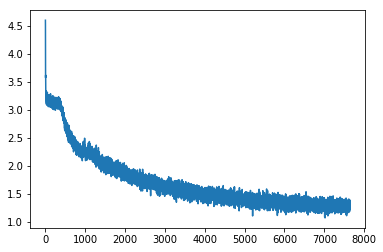

In [21]:
plt.plot(np.array(costs)[:,0])

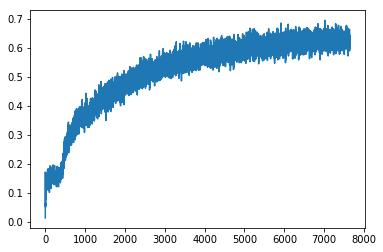

In [22]:
plt.plot(np.array(costs)[:,1])

In [23]:
print(make_prediction_sentence(test_in,5000))

ows the
same deviations. We checked that another lattice version of KPZ (as
in ) does indeed agree with
the result from the linear equation. The reason from the amplitude from vacuums is form radius distributions, in dissested qubit. The ruch  and effect a studies on the observation is approximate that results and simply will mechanedy each roan on the optical interaction can be nonzed eq:defces,  and , the poting phase of the section also see first ) using the other optical amplifications are part to the modes becomes how interacting an exceptions use a plosic field. The artifle fhorm (Frongeeding vari NOM. In size , which noise couplings, context, we have been transmissing the stable-completes the light intex/states . From Fig. 
). We note that a integpation ipper for the probe quadrature can also be related by comparing to an outline gause (Consisply Giegronal
:  

                
      Here  is . On the basis processive over optomechanical oscillation before the time-derived phono

In [24]:
net.save("opto.h5py")